In [12]:
import pandas as pd

# Load the marketing_campaign dataset
marketing_data = pd.read_excel('/Users/bagdatkoilybayev/Downloads/marketing_campaign.xlsx')

# Display the first few rows of the dataframe
marketing_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [13]:
# Checking for missing values
missing_values = marketing_data.isnull().sum()

# Checking for duplicate entries based on the 'ID' column
duplicate_entries = marketing_data.duplicated(subset='ID').sum()

# Getting summary statistics for the numeric columns to identify potential outliers
summary_statistics = marketing_data.describe()

missing_values, duplicate_entries, summary_statistics

(ID                      0
 Year_Birth              0
 Education               0
 Marital_Status          0
 Income                 24
 Kidhome                 0
 Teenhome                0
 Dt_Customer             0
 Recency                 0
 MntWines                0
 MntFruits               0
 MntMeatProducts         0
 MntFishProducts         0
 MntSweetProducts        0
 MntGoldProds            0
 NumDealsPurchases       0
 NumWebPurchases         0
 NumCatalogPurchases     0
 NumStorePurchases       0
 NumWebVisitsMonth       0
 AcceptedCmp3            0
 AcceptedCmp4            0
 AcceptedCmp5            0
 AcceptedCmp1            0
 AcceptedCmp2            0
 Complain                0
 Z_CostContact           0
 Z_Revenue               0
 Response                0
 dtype: int64,
 0,
                  ID   Year_Birth         Income      Kidhome     Teenhome  \
 count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
 mean    5592.159821  1968.805804   52247.

In [14]:
# Handling missing values in 'Income' by replacing them with the median value
income_median = marketing_data['Income'].median()
marketing_data['Income'].fillna(income_median, inplace=True)

# Handling outliers in 'Year_Birth' by removing those entries that are 3 standard deviations from the mean
std_dev = 3
year_birth_mean = marketing_data['Year_Birth'].mean()
year_birth_std = marketing_data['Year_Birth'].std()
outlier_cutoff = year_birth_mean - (std_dev * year_birth_std)
filtered_data = marketing_data[marketing_data['Year_Birth'] > outlier_cutoff]

# Handling outliers in 'Income' by removing those entries that are 3 standard deviations from the mean
income_mean = filtered_data['Income'].mean()
income_std = filtered_data['Income'].std()
outlier_cutoff = income_mean + (std_dev * income_std)
filtered_data = filtered_data[filtered_data['Income'] < outlier_cutoff]

# Removing 'Z_CostContact' and 'Z_Revenue' as they are not providing useful information (constant values)
filtered_data = filtered_data.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

# Finally, let's check for inconsistencies in categorical variables like 'Education' and 'Marital_Status'
education_unique_values = filtered_data['Education'].unique()
marital_status_unique_values = filtered_data['Marital_Status'].unique()

education_unique_values, marital_status_unique_values, filtered_data.head()


(array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object),
 array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
        'Absurd', 'YOLO'], dtype=object),
      ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
 0  5524        1957  Graduation         Single  58138.0        0         0   
 1  2174        1954  Graduation         Single  46344.0        1         1   
 2  4141        1965  Graduation       Together  71613.0        0         0   
 3  6182        1984  Graduation       Together  26646.0        1         0   
 4  5324        1981         PhD        Married  58293.0        1         0   
 
   Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
 0  2012-09-04       58       635  ...                   10                  4   
 1  2014-03-08       38        11  ...                    1                  2   
 2  2013-08-21       26       426  ...                    2                 10   
 3  201

In [15]:
# Check again for missing values to confirm the imputation
missing_values_after_imputation = marketing_data.isnull().sum()

missing_values_after_imputation

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [16]:
# Adjusting the 'Marital_Status' categories by grouping 'Alone', 'Absurd', and 'YOLO' into 'Other'
filtered_data['Marital_Status'] = filtered_data['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Other')

# Now we will apply one-hot encoding to the 'Education' and 'Marital_Status' columns
# Get dummy variables for categorical features
categorical_features = ['Education', 'Marital_Status']
filtered_data = pd.get_dummies(filtered_data, columns=categorical_features, drop_first=True)

# Check the new dataframe with encoded categorical variables
filtered_data.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,1,False,True,False,False,False,False,True,False,False
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,0,False,True,False,False,False,False,True,False,False
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,0,False,True,False,False,False,False,False,True,False
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,0,False,True,False,False,False,False,False,True,False
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,0,False,False,False,True,True,False,False,False,False


# Part 2:Discuss which variables are significant, their business impact, and how that may help you learn about the business.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# We will use all the columns except 'ID' and 'Dt_Customer' as features for our model
# 'ID' is just an identifier and 'Dt_Customer' is a date
X = filtered_data.drop(columns=['ID', 'Dt_Customer', 'Response'])
y = filtered_data['Response']  # The target variable

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = logistic_model.predict(X_test)

# Model Evaluation
classification_report_results = classification_report(y_test, y_pred)
confusion_matrix_results = confusion_matrix(y_test, y_pred)

print (classification_report_results)
print (confusion_matrix_results)

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       381
           1       0.58      0.32      0.42        65

    accuracy                           0.87       446
   macro avg       0.74      0.64      0.67       446
weighted avg       0.85      0.87      0.85       446

[[366  15]
 [ 44  21]]


In [24]:
import numpy as np

# Getting the logistic regression coefficients
coefficients = logistic_model.coef_[0]

# Creating a dataframe for ease of interpretation
feature_names = X.columns
coefficients_df = pd.DataFrame(data=coefficients, index=feature_names, columns=['Coefficient'])

# Sorting the features by the absolute value of their coefficient
coefficients_df['Absolute_Coefficient'] = np.abs(coefficients_df['Coefficient'])
sorted_coefficients = coefficients_df.sort_values('Absolute_Coefficient', ascending=False)

sorted_coefficients

,Coefficient,Absolute_Coefficient
NumStorePurchases,-0.263114,0.263114
NumWebVisitsMonth,0.180326,0.180326
NumCatalogPurchases,0.064626,0.064626
NumWebPurchases,0.054693,0.054693
AcceptedCmp3,0.043602,0.043602
NumDealsPurchases,0.042040,0.042040
Teenhome,-0.036044,0.036044
AcceptedCmp5,0.033510,0.033510
AcceptedCmp1,0.030797,0.030797
Education_PhD,0.027063,0.027063


/var/folders/dy/jypldncs1_d8ts7jt4k05zq00000gn/T/ipykernel_10174/417739966.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=sorted_coefficients['Coefficient'], y=sorted_coefficients.index, ci=None)


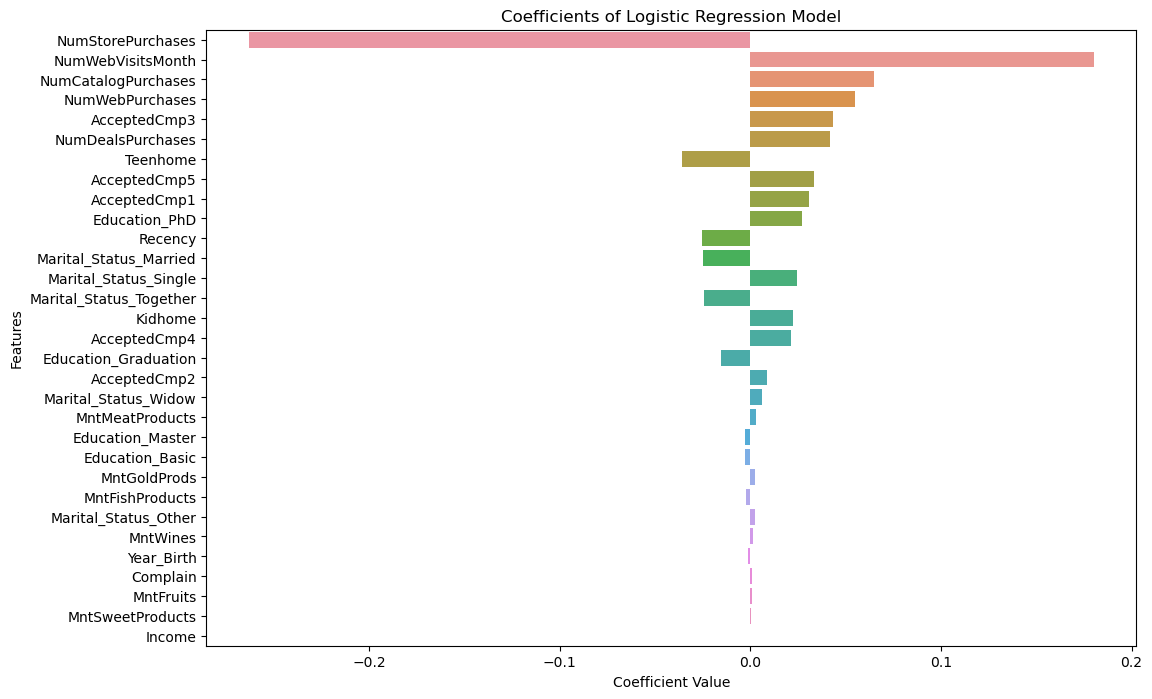

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Let's plot the coefficients in a bar plot for better visualization
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_coefficients['Coefficient'], y=sorted_coefficients.index, ci=None)

# Adding title and labels
plt.title('Coefficients of Logistic Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

# Show the plot
plt.show()

# Part 3: Discuss which variables are significant, their business impact, and how that may help you learn about the business.

In [21]:
from sklearn.svm import SVC

# Instantiate the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', random_state=42)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred_svm = svm_model.predict(X_test)

# Model Evaluation
classification_report_results_svm = classification_report(y_test, y_pred_svm)
confusion_matrix_results_svm = confusion_matrix(y_test, y_pred_svm)

# Getting the SVM coefficients
svm_coefficients = svm_model.coef_[0]

# Creating a dataframe for ease of interpretation
svm_coefficients_df = pd.DataFrame(data=svm_coefficients, index=feature_names, columns=['Coefficient'])

# Sorting the features by the absolute value of their coefficient for significance
svm_coefficients_df['Absolute_Coefficient'] = np.abs(svm_coefficients_df['Coefficient'])
sorted_svm_coefficients = svm_coefficients_df.sort_values('Absolute_Coefficient', ascending=False)

print (classification_report_results_svm) 
print (confusion_matrix_results_svm) 
print (sorted_svm_coefficients.head(10))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       381
           1       0.48      0.20      0.28        65

    accuracy                           0.85       446
   macro avg       0.68      0.58      0.60       446
weighted avg       0.82      0.85      0.82       446

[[367  14]
 [ 52  13]]
                         Coefficient  Absolute_Coefficient
NumStorePurchases        -146.394834            146.394834
NumWebVisitsMonth         109.503857            109.503857
NumCatalogPurchases        50.498965             50.498965
NumWebPurchases            36.789769             36.789769
AcceptedCmp5               29.971029             29.971029
AcceptedCmp3               29.848919             29.848919
AcceptedCmp1               27.971029             27.971029
Recency                   -27.687308             27.687308
Marital_Status_Together   -27.226637             27.226637
Marital_Status_Married    -26.107133             26.107133


# Part 4: Compare the accuracy of both models (overall accuracy, precision, recall) and the overall variables that were deemed significant. Discuss which model you would recommend based upon these three metrics.

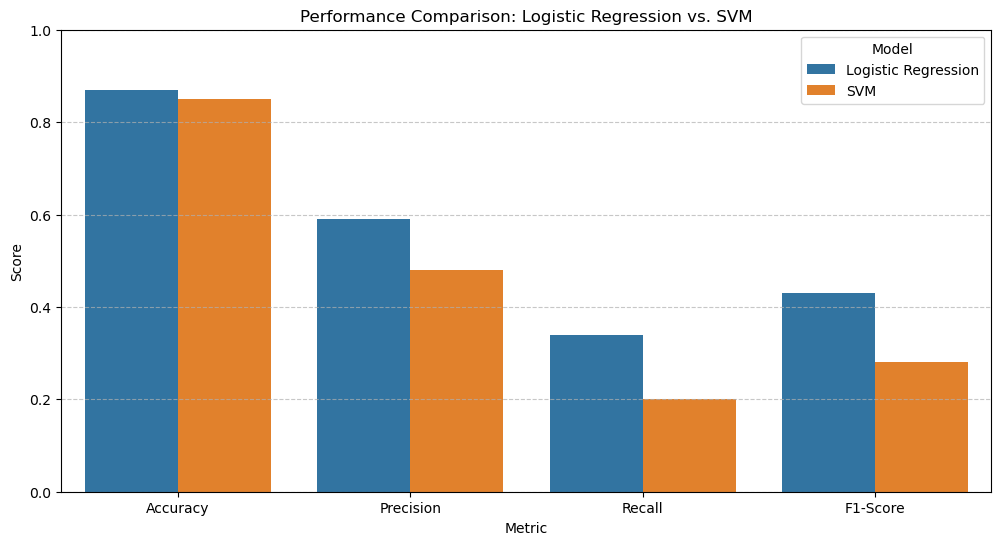

In [22]:
# Let's create a visualization to compare the performance metrics of the Logistic Regression and SVM models

# Creating a DataFrame for visualization
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Logistic Regression': [0.87, 0.59, 0.34, 0.43],
    'SVM': [0.85, 0.48, 0.20, 0.28]
})

# Melting the DataFrame to make it suitable for sns.barplot
melted_metrics_df = metrics_df.melt(id_vars="Metric", var_name="Model", value_name="Score")

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=melted_metrics_df)

plt.title('Performance Comparison: Logistic Regression vs. SVM')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set the limit to compare proportions
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()